# Read SIMPSON files with SimPYson

In [1]:
from simpyson.io import SimpReader
import matplotlib.pyplot as plt

In the `examples` folder, you can find the files `ethanol.in`, `ethanol.fid`, and `ethanol.spe`.

- `ethanol.in` is a standard input file for a SIMPSON simulation of the ethanol molecule.
- `ethanol.fid` represents the simulated free induction decay (FID) of the ethanol molecule.
- `ethanol.spe` represents the NMR spectra of the ethanol molecule.

SimPYson provides the `SimpReader` class, which reads a SIMPSON `fid`, `spe` and `xreim` files. When a `fid` file is read `SimpReader` creates a Python object with the following data:

- `real` - The real part of the FID.
- `imag` - The imaginary part of the FID.
- `np` - The number of points.
- `sw`  - The spectral width.
- `time` - The time in milliseconds.

In [2]:
fid = SimpReader('../../examples/read/ethanol.fid', format='fid')

for key, values in fid.data.items():
    print(key, values)

real [95.9999136 63.5468932 20.9678205 ...  0.         0.         0.       ]
imag [ 0.        52.0761046 48.2650021 ...  0.         0.         0.       ]
np 4096.0
sw 10000.0
time [0.00000000e+00 1.00024420e+00 2.00048840e+00 ... 4.09399951e+03
 4.09499976e+03 4.09600000e+03]


The data can be easily plotted using matplotlib

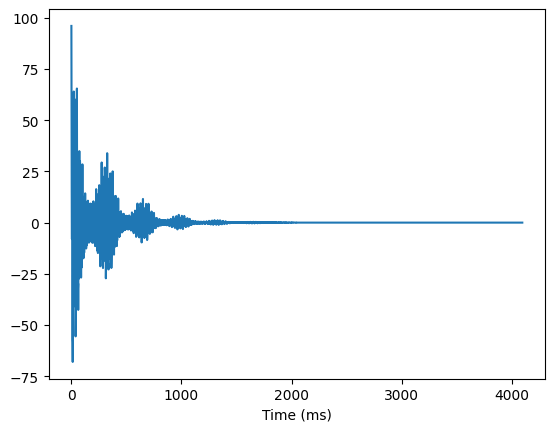

In [3]:
plt.plot(fid.data['time'], fid.data['real'])
plt.xlabel('Time (ms)')
plt.show()

When reading `spe` files the following data is extracted:

- `real` - The real part of the spectrum.
- `imag` - The imaginary part of the spectrum.
- `np` - The number of points.
- `sw`  - The spectral width.
- `hz` - The frequency in Hz.

In [4]:
spe = SimpReader('../../examples/read/ethanol.spe', format='spe')

for key, value in spe.data.items():
    print(key, value)

real [0.18006085 0.19032725 0.1798519  ... 0.19060431 0.18027098 0.19046516]
imag [-20.1918974 -20.1791859 -20.0945303 ... -20.3742075 -20.2894344
 -20.2766117]
np 4096.0
sw 10000.0
hz [-5000.         -4997.55799756 -4995.11599512 ...  4995.11599512
  4997.55799756  5000.        ]


The <sup>1</sup>H NMR spectra of ethanol show 3 <sup>1</sup>H NMR peaks:
- Triplet from the CH<sub>3</sub> group
- Quartet from the CH<sub>2</sub> group
- Single from the OH group

You can edit `jcoupling` in the file `examples/ethanol.in` to see the effect of J-coupling on the spliting of the <sup>1</sup>H peaks

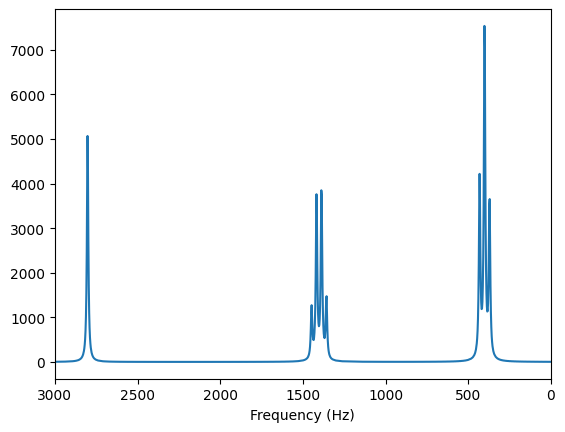

In [5]:
plt.plot(spe.data['hz'], spe.data['real'])
plt.xlabel('Frequency (Hz)')
plt.xlim(3000, 0)
plt.show()

The data can be converted from frequency (Hz) to ppm by providing the external magnetic field (B<sub>0</sub>) in either Tesla or MHz, and specify the nucleus being observed

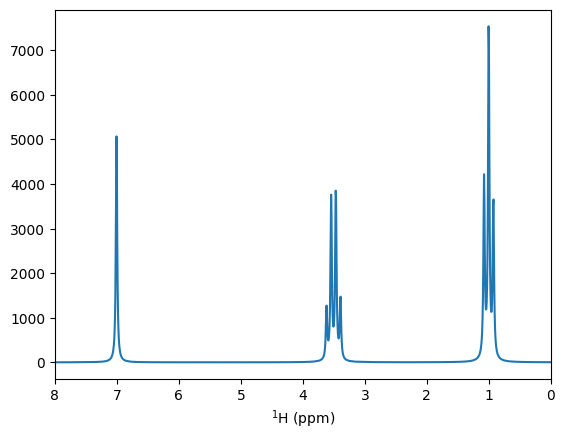

In [6]:
spe_ppm = SimpReader('../../examples/read/ethanol.spe', format='spe', b0='400MHz', nucleus='1H')
plt.plot(spe_ppm.data['ppm'], spe_ppm.data['real'])
plt.xlabel('$^1$H (ppm)')
plt.xlim(8, 0)
plt.show()

Lastly, you can convert any `fid` file into a `spe` easily by using `.to_spe()`

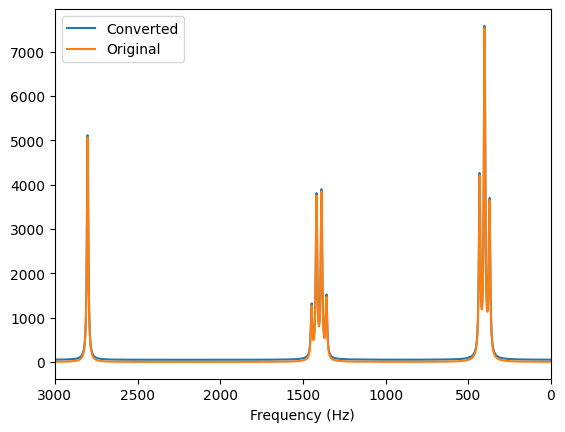

In [7]:
conv_spe = fid.to_spe()

plt.plot(conv_spe.data['hz'], conv_spe.data['real'], label = 'Converted')
plt.plot(spe.data['hz'], spe.data['real'], label = 'Original')
plt.xlim(3000, 0)
plt.xlabel('Frequency (Hz)')
plt.legend()

The data can be easily exported to a `.csv` file

In [9]:
import pandas as pd

df = pd.DataFrame(fid.data)
df.to_csv('../../examples/read/fid.csv', index=False)